In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-51.156257721682735 -17.597980360769213
53.048849881800436 14.038921424185588
12.255972466792429 -61.21164194438006
61.009973789229406 -167.91602737666972
75.5677237703535 24.399780019988384
-75.39708620719719 0.6082780557601097
-56.68150058718337 -40.85299845255591
50.641117272823266 -97.49854098158785
47.71413142876597 176.17690388460284
-62.49539988120589 98.2603815180367
36.128348224755584 -41.32239072176074
-3.3317041497299584 133.08007951775727
-44.40846013441119 -120.80316767848078
89.90417329104321 -163.48502085466916
51.09436154013315 116.25473388511887
-75.93403309692907 19.857411199006833
36.38220530476272 36.23162212611814
-25.009442709304906 -67.84568610682398
65.01086679068408 -58.958242066542525
-34.43632102932234 83.85097978013721
81.99328260636574 -112.80779956411652
40.955640865426574 -174.75548743530186
-26.810594348419336 -140.13582090326832
-27.181778812183374 25.46194643556649
-69.003071135561 -129.5713512278082
29.01646744315417 70.09821552952087
41.4442925660261

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3f96fa8f7ca18de56fa2a422b01edb2c


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | angermunde
Processing Record 3 of Set 1 | hillsborough
Processing Record 4 of Set 1 | nome
Processing Record 5 of Set 1 | havoysund
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | gimli
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | tual
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | kalanguy
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | belen
Processing Record 18 of Set 1 | salta
Processing Record 19 of Set 1 | sisimiut
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | provideniya
Processing Record 23 of Set 1 

Processing Record 37 of Set 4 | georgetown
Processing Record 38 of Set 4 | macau
Processing Record 39 of Set 4 | opuwo
Processing Record 40 of Set 4 | enumclaw
Processing Record 41 of Set 4 | miastko
Processing Record 42 of Set 4 | horizontina
Processing Record 43 of Set 4 | artesia
Processing Record 44 of Set 4 | port elizabeth
Processing Record 45 of Set 4 | maragogi
Processing Record 46 of Set 4 | coahuayana
Processing Record 47 of Set 4 | lixourion
Processing Record 48 of Set 4 | santa isabel do rio negro
Processing Record 49 of Set 4 | bilibino
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | mount isa
Processing Record 2 of Set 5 | tabulbah
City not found. Skipping...
Processing Record 3 of Set 5 | ust-ilimsk
Processing Record 4 of Set 5 | council bluffs
Processing Record 5 of Set 5 | escarcega
Processing Record 6 of Set 5 | karatuzskoye
Processing Record 7 of Set 5 | solovetskiy
City not found. Skipping...
Processing Record 8 of Set 5 | heyang
Processi

Processing Record 25 of Set 8 | verkh-usugli
Processing Record 26 of Set 8 | hofn
Processing Record 27 of Set 8 | rayagada
Processing Record 28 of Set 8 | fivizzano
Processing Record 29 of Set 8 | necochea
Processing Record 30 of Set 8 | gomel
Processing Record 31 of Set 8 | cavalcante
Processing Record 32 of Set 8 | bandarbeyla
Processing Record 33 of Set 8 | baghdad
Processing Record 34 of Set 8 | tasiilaq
Processing Record 35 of Set 8 | pemangkat
Processing Record 36 of Set 8 | port blair
Processing Record 37 of Set 8 | rio gallegos
Processing Record 38 of Set 8 | tadine
Processing Record 39 of Set 8 | mehamn
Processing Record 40 of Set 8 | constitucion
Processing Record 41 of Set 8 | longonjo
Processing Record 42 of Set 8 | north bend
Processing Record 43 of Set 8 | neuquen
Processing Record 44 of Set 8 | sangueya
Processing Record 45 of Set 8 | lagoa
Processing Record 46 of Set 8 | clarence town
Processing Record 47 of Set 8 | kloulklubed
Processing Record 48 of Set 8 | gualaceo
P

Processing Record 12 of Set 12 | corinto
Processing Record 13 of Set 12 | nkowakowa
Processing Record 14 of Set 12 | sackville
Processing Record 15 of Set 12 | semey
Processing Record 16 of Set 12 | kawambwa
Processing Record 17 of Set 12 | posadas
Processing Record 18 of Set 12 | krasnoselkup
Processing Record 19 of Set 12 | margate
Processing Record 20 of Set 12 | suclayin
Processing Record 21 of Set 12 | santa fe
Processing Record 22 of Set 12 | ust-tsilma
Processing Record 23 of Set 12 | jiayuguan
Processing Record 24 of Set 12 | kaspiysk
Processing Record 25 of Set 12 | piedras negras
Processing Record 26 of Set 12 | wittmund
Processing Record 27 of Set 12 | ketchikan
Processing Record 28 of Set 12 | kununurra
Processing Record 29 of Set 12 | galesong
Processing Record 30 of Set 12 | rungata
City not found. Skipping...
Processing Record 31 of Set 12 | palauig
Processing Record 32 of Set 12 | medyn
Processing Record 33 of Set 12 | roma
Processing Record 34 of Set 12 | port hedland


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,63.99,75,0,1.01,US,2022-07-31 04:13:55
1,Angermunde,53.0150,13.9992,64.33,74,0,3.06,DE,2022-07-31 04:14:19
2,Hillsborough,37.5741,-122.3794,65.52,90,100,16.11,US,2022-07-31 04:14:19
3,Nome,64.5011,-165.4064,64.17,44,0,8.05,US,2022-07-31 04:13:49
4,Havoysund,70.9963,24.6622,52.03,87,97,9.93,NO,2022-07-31 04:14:19
5,Hermanus,-34.4187,19.2345,52.29,66,63,4.05,ZA,2022-07-31 04:14:20
6,Mar Del Plata,-38.0023,-57.5575,51.10,94,0,3.00,AR,2022-07-31 04:14:20
7,Gimli,50.6336,-96.9907,69.19,77,93,4.45,CA,2022-07-31 04:14:20
8,Nikolskoye,59.7035,30.7861,60.87,82,10,5.10,RU,2022-07-31 04:14:21
9,Busselton,-33.6500,115.3333,58.66,62,64,12.66,AU,2022-07-31 04:14:21


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-07-31 04:13:55,42.0970,-79.2353,63.99,75,0,1.01
1,Angermunde,DE,2022-07-31 04:14:19,53.0150,13.9992,64.33,74,0,3.06
2,Hillsborough,US,2022-07-31 04:14:19,37.5741,-122.3794,65.52,90,100,16.11
3,Nome,US,2022-07-31 04:13:49,64.5011,-165.4064,64.17,44,0,8.05
4,Havoysund,NO,2022-07-31 04:14:19,70.9963,24.6622,52.03,87,97,9.93
...,...,...,...,...,...,...,...,...,...
555,Chapais,CA,2022-07-31 04:29:31,49.7834,-74.8492,62.38,80,99,7.40
556,Oktyabrskiy,RU,2022-07-31 04:29:31,54.4815,53.4710,67.89,68,62,2.08
557,Grindavik,IS,2022-07-31 04:29:31,63.8424,-22.4338,49.95,87,75,6.91
558,Bantry,IE,2022-07-31 04:29:32,51.6833,-9.4500,60.78,99,100,6.02


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

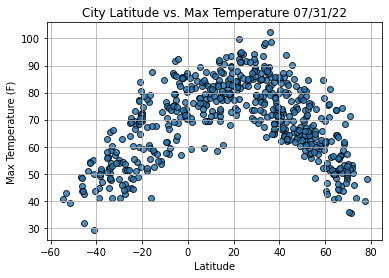

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

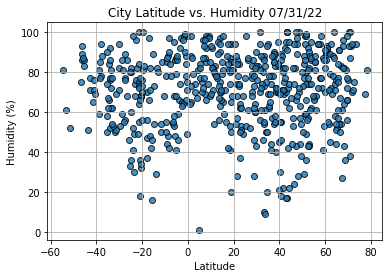

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

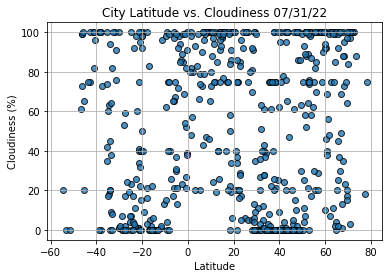

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

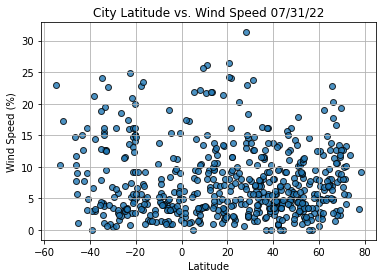

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()